In [2]:
import sys
from re import split
sys.path.append('../../../')
import os
import pandas as pd
import glob
import numpy as np
from impedance.circuits import Randles, CustomCircuit
import matplotlib.pyplot as plt
from impedance.plotting import plot_nyquist
from impedance import preprocessing

In [17]:
def FitCirc_Plot(circ, inits, frequencies, Z_data, **kwargs):
    """ Function for fitting and plotting fit results of a defined circuit

    Parameters
    ----------
    circ : string
        string defining the equivalent circuit to be fit

    inits : list of floats
        initial guesses for the fir parameters

    frequencies : numpy array
        Frequencies

    Z_data : numpy array of dtype 'complex128'
        Impedance data to be fit

    Returns
    -------

    Notes
    -----
    Prints fitting results and displays figure of impedance data with fit
    and an inset of high frequency data of length specified by kwarg 'inset_len'
    with default value 30. Optionally saves "Main" Figure and "Inset" Figure 
    if save_figs is True and fig_name is not empty.

    """
    circuit = CustomCircuit(initial_guess = inits, circuit = circ)
    circuit.fit(frequencies, Z_data)
    print(circuit)

    pred_freq = np.logspace(np.log10(frequencies[0]), np.log10(frequencies[-1]), num = freqs.size)
    custom_fit = circuit.predict(pred_freq)

    fig1 = plt.figure(figsize = main_figsize)
    ax0 = fig1.add_subplot(211)
    plot_nyquist(ax0, freqs, Z, fmt='s')
    plot_nyquist(ax0, pred_freq,custom_fit, fmt='-')
    ax0.legend(['Data', 'Custom Circuit'])

    if 'inset_len' in kwargs:
        inset_len = kwargs['inset_len']
        try:
            inset_len *= 1
        except TypeError:
            print('inset_len is not an integer value.')

        inset_len = int(inset_len)
    else:
        inset_len = 30

    fig2 = plt.figure(figsize = inset_figsize)
    ax1 = fig2.add_subplot(212)
    plot_nyquist(ax1, freqs[:inset_len], Z[:inset_len], fmt = 's')
    plot_nyquist(ax1, pred_freq[:inset_len], custom_fit[:inset_len], fmt = '-')

    if 'save_figs' in kwargs and kwargs['save_figs']==True:
        if 'fig_name' not in kwargs:
            print('No file name for t')
        else:
            fig1.savefig(kwargs['fig_name'] + ' Main.png',dpi=300,bbox_inches='tight')
            fig2.savefig(kwargs['fig_name'] + ' Inset.png',dpi=300,bbox_inches='tight')

In [9]:
direc = r'\Data'
print(os.getcwd())
all_files=glob.glob(os.getcwd() + direc + '\*.par')
all_files.sort()

f_name=all_files[1]
print(f_name)
freqs, Z= preprocessing.readVersaStudio(f_name)

C:\Users\shadd\OneDrive\Documents\Python\EIS
C:\Users\shadd\OneDrive\Documents\Python\EIS\Data\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par


In [5]:
# Some initial guess values for all circuits
d=266e-9 #thickness of Al2O3 mask
A=3e-3*3e-3-(6*1e-3*4e-6) #Area of mask minus area of electrode gates

R_elyte=32.8

C_if=1.4e-6
R_if=15

C_mask=9.7*8.854e-12*8.976e-6/266e-9 #permitivity=9.7 thickness=266 nm
R_mask=3.54e5*d/A
R_chem=1600
C_chem=2.23e-4

min_ind=np.argmin(np.imag(Z[:]))
tg_init=freqs[min_ind]
Rg_init=1600

main_figsize=(10,7.5)
inset_figsize=(6,6)


Circuit string: R0-p(R1,C1)-p(R2,E2)
Fit: True

Initial guesses:
     R0 = 3.28e+01 [Ohm]
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
     R2 = 1.60e+03 [Ohm]
   E2_0 = 2.23e-04 [Ohm^-1 sec^a]
   E2_1 = 9.50e-01 []

Fit parameters:
     R0 = 5.86e+01  (+/- 2.62e+00) [Ohm]
     R1 = 8.65e+00  (+/- 2.72e+00) [Ohm]
     C1 = 1.12e-06  (+/- 8.97e-07) [F]
     R2 = 1.54e+03  (+/- 4.07e+00) [Ohm]
   E2_0 = 3.06e-04  (+/- 1.49e-06) [Ohm^-1 sec^a]
   E2_1 = 7.16e-01  (+/- 2.42e-03) []



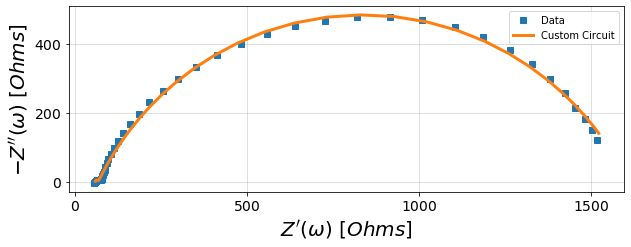

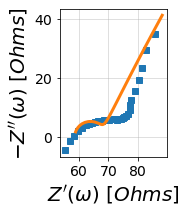

In [11]:
inits1=[R_elyte,R_if,C_if,R_chem,C_chem,.95]
circ1='R0-p(R1,C1)-p(R2,E2)'

FitCirc_Plot(circ1, inits1, freqs,Z) #,save_figs=False,fig_name=r'Figures/1% OCV Circuit1')


Circuit string: R0-p(R1,C1)-G1
Fit: True

Initial guesses:
     R0 = 3.28e+01 [Ohm]
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
   G1_0 = 1.60e+03 [Ohm]
   G1_1 = 3.59e-01 [sec]

Fit parameters:
     R0 = 4.44e+01  (+/- 8.51e+07) [Ohm]
     R1 = 9.77e-05  (+/- 8.51e+07) [Ohm]
     C1 = 2.64e-23  (+/- 2.55e+03) [F]
   G1_0 = 1.45e+03  (+/- 1.46e+01) [Ohm]
   G1_1 = 8.39e-01  (+/- 1.92e-02) [sec]



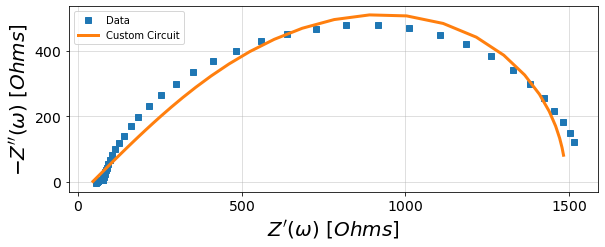

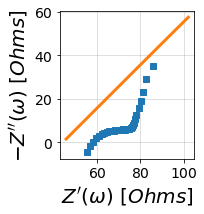

In [12]:
inits2=[R_elyte,R_if,C_if,Rg_init,tg_init]
circ2='R0-p(R1,C1)-G1'

FitCirc_Plot(circ2, inits2, freqs,Z) #,save_figs=False,fig_name=r'Figures/1% OCV Circuit2')


Circuit string: R0-p(C2,p(R1,C1)-G1)
Fit: True

Initial guesses:
     R0 = 3.28e+01 [Ohm]
     C2 = 2.90e-09 [F]
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
   G1_0 = 1.60e+03 [Ohm]
   G1_1 = 3.59e-01 [sec]

Fit parameters:
     R0 = 4.17e+01  (+/- 1.54e+06) [Ohm]
     C2 = 1.64e-25  (+/- 2.95e-06) [F]
     R1 = 2.66e+00  (+/- 1.54e+06) [Ohm]
     C1 = 3.93e-25  (+/- 7.52e-06) [F]
   G1_0 = 1.45e+03  (+/- 1.42e+01) [Ohm]
   G1_1 = 8.39e-01  (+/- 1.84e-02) [sec]



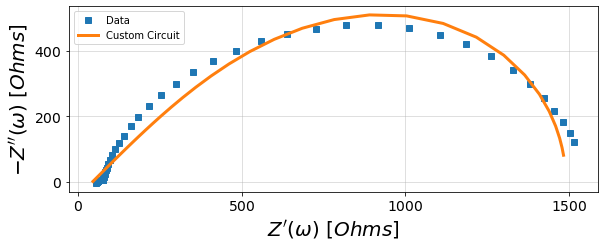

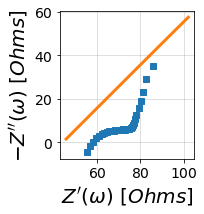

In [13]:
min_ind=np.argmin(np.imag(Z[:]))

inits3=[R_elyte,C_mask,R_if,C_if,Rg_init,tg_init]
circ3='R0-p(C2,p(R1,C1)-G1)'

FitCirc_Plot(circ3, inits3, freqs,Z) #,save_figs=False,fig_name=r'Figures/1% OCV Circuit3')


Circuit string: R0-p(E2,p(R1,C1)-G1)
Fit: True

Initial guesses:
     R0 = 3.28e+01 [Ohm]
   E2_0 = 2.90e-09 [Ohm^-1 sec^a]
   E2_1 = 9.50e-01 []
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
   G1_0 = 1.60e+03 [Ohm]
   G1_1 = 3.59e-01 [sec]

Fit parameters:
     R0 = 6.55e+01  (+/- 1.41e+00) [Ohm]
   E2_0 = 3.05e-04  (+/- 4.88e-06) [Ohm^-1 sec^a]
   E2_1 = 7.12e-01  (+/- 9.81e-03) []
     R1 = 1.81e+00  (+/- 1.35e+05) [Ohm]
     C1 = 2.37e-03  (+/- 9.94e+01) [F]
   G1_0 = 1.54e+03  (+/- 1.35e+05) [Ohm]
   G1_1 = 4.59e-03  (+/- 6.73e-01) [sec]



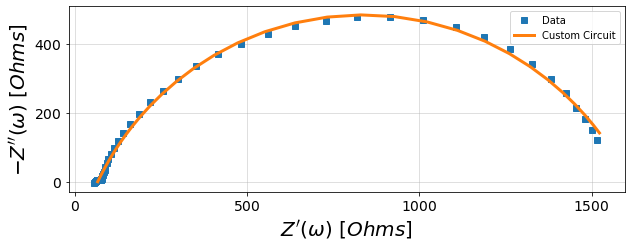

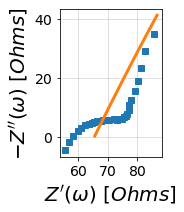

In [14]:
inits4=[R_elyte,C_mask,.95,R_if,C_if,Rg_init,tg_init]
circ4='R0-p(E2,p(R1,C1)-G1)'

FitCirc_Plot(circ4, inits4, freqs,Z) #,save_figs=False,fig_name=r'Figures/1% OCV Circuit4')


Circuit string: R0-p(C2,R2,p(R1,C1)-G1)
Fit: True

Initial guesses:
     R0 = 3.28e+01 [Ohm]
     C2 = 2.90e-09 [F]
     R2 = 1.05e+04 [Ohm]
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
   G1_0 = 1.60e+03 [Ohm]
   G1_1 = 3.59e-01 [sec]

Fit parameters:
     R0 = 7.07e+01  (+/- 7.38e-01) [Ohm]
     C2 = 5.43e-05  (+/- 1.10e-06) [F]
     R2 = 2.24e+03  (+/- 3.90e+01) [Ohm]
     R1 = 6.74e+02  (+/- 1.27e+02) [Ohm]
     C1 = 9.80e-03  (+/- 4.33e-03) [F]
   G1_0 = 3.74e+03  (+/- 1.97e+02) [Ohm]
   G1_1 = 2.22e+00  (+/- 1.83e-01) [sec]



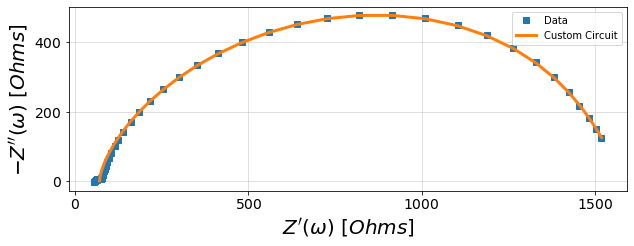

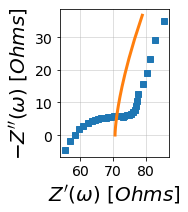

In [15]:
inits5=[R_elyte,C_mask,R_mask,R_if,C_if,Rg_init,tg_init]
circ5='R0-p(C2,R2,p(R1,C1)-G1)'

FitCirc_Plot(circ5, inits5, freqs,Z) #,save_figs=False,fig_name=r'Figures/1% OCV Circuit5')


Circuit string: R0-p(E2,R2,p(R1,C1)-G1)
Fit: True

Initial guesses:
     R0 = 3.28e+01 [Ohm]
   E2_0 = 2.90e-09 [Ohm^-1 sec^a]
   E2_1 = 8.00e-01 []
     R2 = 1.05e+04 [Ohm]
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
   G1_0 = 1.60e+03 [Ohm]
   G1_1 = 3.59e-01 [sec]

Fit parameters:
     R0 = 6.54e+01  (+/- 3.04e+00) [Ohm]
   E2_0 = 3.05e-04  (+/- 5.38e-06) [Ohm^-1 sec^a]
   E2_1 = 7.12e-01  (+/- 1.08e-02) []
     R2 = 9.93e+03  (+/- 1.08e+06) [Ohm]
     R1 = 2.88e-03  (+/- 1.39e+04) [Ohm]
     C1 = 4.20e-05  (+/- 1.81e+04) [F]
   G1_0 = 1.83e+03  (+/- 4.90e+04) [Ohm]
   G1_1 = 4.60e-03  (+/- 8.04e-02) [sec]



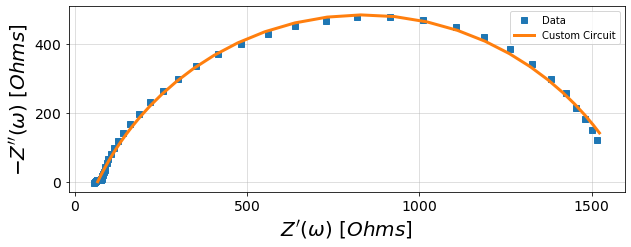

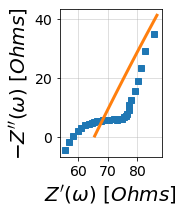

In [16]:
inits6=[R_elyte,C_mask,.8,R_mask,R_if,C_if,Rg_init,tg_init]
circ6='R0-p(E2,R2,p(R1,C1)-G1)'

FitCirc_Plot(circ6, inits6, freqs,Z) #,save_figs=False,fig_name=r'Figures/1% OCV Circuit6')